In [149]:
"""Combining Gates & Activation functions
src : https://github.com/Audhil/tensorflow_cookbook/blob/master/06_Neural_Networks/03_Working_with_Activation_Functions/03_activation_functions.ipynb"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Displaying Sigmoid & ReLU activation functions for .75 target
Step : 50   A1 : [[-0.70978492]]  A2 : [[ 0.54816276]]  b1 : [[ 1.51930404]]  b2 : [[-0.32817137]]
Sigmoid : 0.521404 ReLU : 0.778922
Step : 100   A1 : [[-0.61337411]]  A2 : [[ 0.53796732]]  b1 : [[ 1.56727636]]  b2 : [[-0.33065185]]
Sigmoid : 0.585898 ReLU : 0.739293


Step : 150   A1 : [[-0.54380018]]  A2 : [[ 0.53850287]]  b1 : [[ 1.60182297]]  b2 : [[-0.32772854]]
Sigmoid : 0.62713 ReLU : 0.743294
Step : 200   A1 : [[-0.49358481]]  A2 : [[ 0.53870177]]  b1 : [[ 1.62684727]]  b2 : [[-0.32496569]]
Sigmoid : 0.655698 ReLU : 0.747148
Step : 250   A1 : [[-0.45615354]]  A2 : [[ 0.53827685]]  b1 : [[ 1.64551032]]  b2 : [[-0.32250664]]
Sigmoid : 0.676833 ReLU : 0.746528
Step : 300   A1 : [[-0.42711437]]  A2 : [[ 0.53617185]]  b1 : [[ 1.65991485]]  b2 : [[-0.32082692]]
Sigmoid : 0.693098 ReLU : 0.740092
Step : 350   A1 : [[-0.40453169]]  A2 : [[ 0.53346843]]  b1 : [[ 1.671103]]  b2 : [[-0.31962323]]
Sigmoid : 0.701442 ReLU : 0.75712


Step : 400   A1 : [[-0.38694739]]  A2 : [[ 0.53245318]]  b1 : [[ 1.67982447]]  b2 : [[-0.31759399]]
Sigmoid : 0.710857 ReLU : 0.755605
Step : 450   A1 : [[-0.37296605]]  A2 : [[ 0.53178447]]  b1 : [[ 1.68675137]]  b2 : [[-0.31543836]]
Sigmoid : 0.718177 ReLU : 0.75529
Step : 500   A1 : [[-0.36170587]]  A2 : [[ 0.53142339]]  b1 : [[ 1.69231844]]  b2 : [[-0.31312779]]
Sigmoid : 0.724737 ReLU : 0.750653


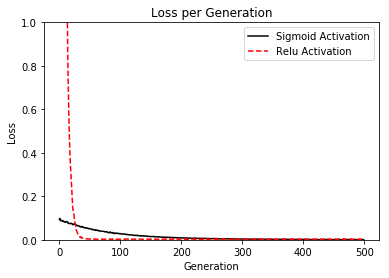

In [150]:
# to generate the same random number for each iteration or running the code
np.random.seed(0)
tf.set_random_seed(5)

y_actual_value = .75
batch_size = 25
learning_rate = .01
epochs = 500
display_step = 50

# random numbers
x = np.random.normal(2, .1, 500)

# formulae
# y = A * x + b

A1 = tf.Variable(tf.random_normal(shape=[1, 1]))
b1 = tf.Variable(tf.random_normal(shape=[1, 1]))
A2 = tf.Variable(tf.random_normal(shape=[1, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1, 1]))

x_place_holder = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# sigmoid activation
sigmoid_activation = tf.nn.sigmoid(tf.add(b1, tf.multiply(x_place_holder, A1)))

# relu activation
relu_activation = tf.nn.relu(tf.add(b2, tf.multiply(x_place_holder, A2)))

# loss - MSE
sigmoid_loss = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, y_actual_value)))
relu_loss = tf.reduce_mean(tf.square(tf.subtract(relu_activation, y_actual_value)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train_sigmoid = optimizer.minimize(sigmoid_loss)
train_relu = optimizer.minimize(relu_loss)

init_vars = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_vars)

    # for plotting purpose
    sigmoid_loss_list = []
    relu_loss_list = []
    print('Displaying Sigmoid & ReLU activation functions for .75 target')
    for i in range(epochs):
        random_index = np.random.choice(len(x), size=batch_size)
        sess.run(train_sigmoid, feed_dict={x_place_holder: np.transpose([x[random_index]])})
        sess.run(train_relu, feed_dict={x_place_holder: np.transpose([x[random_index]])})

        sigmoid_loss_list.append(sess.run(sigmoid_loss, feed_dict={x_place_holder: np.transpose([x[random_index]])}))
        relu_loss_list.append(sess.run(relu_loss, feed_dict={x_place_holder: np.transpose([x[random_index]])}))

        if (i + 1) % display_step == 0:
            print('Step : %d ' % (i + 1),
                  ' A1 : ' + str(sess.run(A1)),
                  ' A2 : ' + str(sess.run(A2)),
                  ' b1 : ' + str(sess.run(b1)),
                  ' b2 : ' + str(sess.run(b2)))

            sigmoid_output = np.mean(
                sess.run(sigmoid_activation, feed_dict={x_place_holder: np.transpose([x[random_index]])}))

            relu_output = np.mean(
                sess.run(relu_activation, feed_dict={x_place_holder: np.transpose([x[random_index]])}))

            print('Sigmoid : ' + str(np.mean(sigmoid_output))
                  + ' ReLU : ' + str(np.mean(relu_output)))

    # plot the graph
    plt.plot(sigmoid_loss_list, 'k-', label='Sigmoid Activation')
    plt.plot(relu_loss_list, 'r--', label='Relu Activation')
    plt.ylim(0, 1.0)
    plt.title('Loss per Generation')
    plt.legend(loc='upper right')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.show()
